## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [13]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn
import scipy.stats as st
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [6]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


[ -2.85650529e-05   1.01794756e+00]


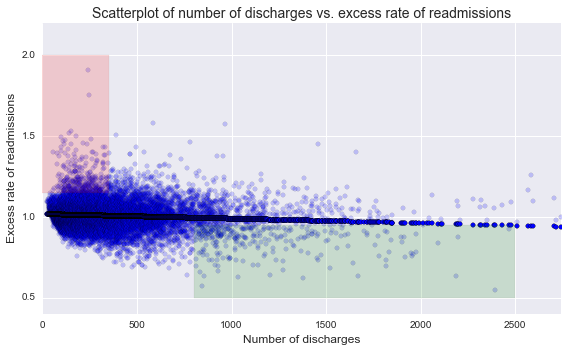

In [7]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
# the [81:-3] is used to remove hospitals with 0 admissions; 
# actually I am not sure about the [:-3] part...

x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fit = np.polyfit(x,y,1)
print(fit)
fit_fn = np.poly1d(fit)

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y, alpha=0.2)
ax.scatter(x, fit_fn(x))

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## A.  Do you agree with the above analysis and recommendations? Why or why not?

Overall, **I do not agree with the analysis of this work**. I report the reasonses below.

The initial observations are just that, observations that one then needs to validate with proper statistics. And the statistics is the weakest part of this study. Specific criticism is:

- This is an observational study, so one cannot investigate the possibility of a causal connection! There might be many other factors that explain the observed trends. For instance, renowned hospitals might get a larger fraction of complicated cases and hence have higher rates of admission.

- They do not do any inferential statistics; they simply calculate the means and what fraction of the sample data has a readmission rate greater than 1.

- We do not know whether the observed trends are due to noise/chance (null hypothesis) or a real trend

- They do not report standar errors, confidence intervals, etc

- They introduce two categories, one for the number of discharges < 100 and one for > 1000. However, their conclusions are about hospitals with <300 dischrges, i.e. an interval that has not been studied.

- The change observed is tiny, ~2% above/below the expected value; one wonders if this is of practical significance...

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

In order to check the conclusions from this study, I will perform a hypothesis test. The null hypothesis is that there is no difference between the readmission rate of the two groups. The alternative hypothesis is that there is a difference. 

In [21]:
data.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13,07/01/2010,06/30/2013


In [8]:
#Counting the number of points for when the number of discharges is < 100 or >1000
ser = clean_hospital_read_df['Number of Discharges'][81:-3]
print('Sample size for number of discharges < 100 and > 1000: ' + str(len(ser[ser<100])) + ' and ' + str(len(ser[ser > 1000]))) 

Sample size for number of discharges < 100 and > 1000: 1188 and 460


The sample mean and stdev are: 1.02 and 0.06


0.06

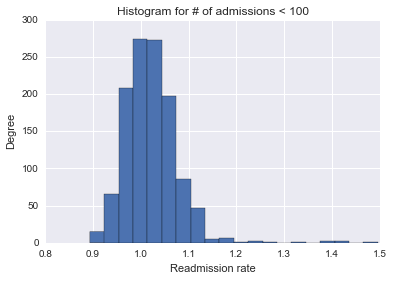

In [14]:
data = clean_hospital_read_df
data = data[(data['Number of Discharges'] < 100) & (data['Number of Discharges'] > 0)]
data['Excess Readmission Ratio'].plot(kind = 'hist', bins = 20, title = 'Histogram for # of admissions < 100').set_xlabel('Readmission rate')
len(data)
print('The sample mean and stdev are: ' + str(round(data['Excess Readmission Ratio'].mean(),2)) + ' and ' + str(round(data['Excess Readmission Ratio'].std(),2)) )
mu_100 = round(data['Excess Readmission Ratio'].mean(),2)
std_100 = round(data['Excess Readmission Ratio'].std(),2)
std_100

The sample mean and stdev are: 0.98 and 0.12


0.12

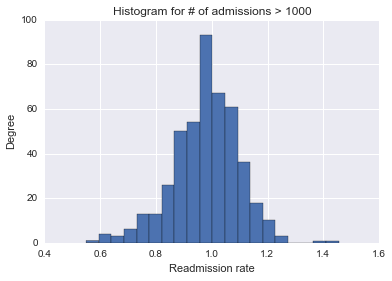

In [15]:
data = clean_hospital_read_df
data = data[(data['Number of Discharges'] > 1000)]
data['Excess Readmission Ratio'][0:-3].plot(kind = 'hist', bins = 20, title = 'Histogram for # of admissions > 1000').set_xlabel('Readmission rate')
len(data[0:-3])
print('The sample mean and stdev are: ' + str(round(data['Excess Readmission Ratio'].mean(),2)) + ' and ' + str(round(data['Excess Readmission Ratio'].std(),2)) )
mu_1000 = round(data['Excess Readmission Ratio'].mean(),2)
std_1000 = round(data['Excess Readmission Ratio'].std(),2)
std_1000

In [11]:
SE = sqrt((std_100*std_100/1188) + (std_1000*std_1000/1188))
round(SE,4)

0.0039

In [20]:
Z = (mu_100 - mu_1000)/SE
1-st.norm.cdf(Z)

0.040000000000000036

The sample mean and stdev are: 1.01 and 0.08


1.01

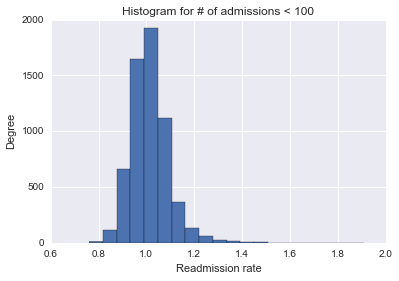

In [18]:
data = clean_hospital_read_df
data = data[(data['Number of Discharges'] < 300) & (data['Number of Discharges'] > 0)]
data['Excess Readmission Ratio'].plot(kind = 'hist', bins = 20, title = 'Histogram for # of admissions < 300').set_xlabel('Readmission rate')
len(data)
print('The sample mean and stdev are: ' + str(round(data['Excess Readmission Ratio'].mean(),2)) + ' and ' + str(round(data['Excess Readmission Ratio'].std(),2)) )
mu_300 = round(data['Excess Readmission Ratio'].mean(),2)
std_300 = round(data['Excess Readmission Ratio'].std(),2)
mu_300

In [19]:
SE = sqrt((std_300*std_300/6108) + (std_1000*std_1000/1188))
Z = (mu_300 - mu_1000)/SE
1-st.norm.cdf(Z)

1.1102230246251565e-16

In [25]:
#Estimating the really bad hospitals
bad_hosp = data[(data['Excess Readmission Ratio'] > 1.1)]
len(bad_hosp)

695

## Discussion of the results

The statistical anlysis performed above shows that the observed difference between the readmission rate for hospitals with less than 100 admissions and that of hospitals with more than a 1000 is statistically different. Indeed the p-value we obtain is basically zero (within Python's numerical accuracy). Similar results were obtained for the case of hospitals with less than 300 and more than a 1000 admissions per year. In summary, the difference is **statistically significant**.

On the other hand, **one wonders if the results are of practical significance**. Indeed the observed change between the admission rates of hospital with less than 100 and those with more than 1000 is approximately 4%. This is a fairly **small difference**. Indeed, in the health-care industry one usually observes large fluctiations between different types of hospitals. I also point out that there is a sizable number of hospitals (695) with readmission rates larger than 1.10 (i.e. these are at least 10% worse than expected). Future efforts might look into whether these hospital can be predicted by another variable. That would be of practical significance.


Another issue is that, since this is an observational study, **one cannot make a causal connection** with the number of admissions. As mentioned above, the observed trends might be explained by other factors. One would have to make an experiment - which in this particular case is not easy, since it would imply randmly assigning ER patients ro hospitals, while one usually chooses an ER based on its proximity and other urgency factors.